## Auswirkungen der unterschiedlichen Ladekurven/EVs auf den Lastverlauf

Nachdem die Simulation ansich vollständig funktionert, soll die Auswirkung der unterschiedlichen EVs auf den Lastverlauf untersucht werden. Dafür wird nacheinander mit einem spezifischen Fahrzeugtyp simuliert, und dann die Lastverläufe der einzelenen Durchläufe miteinander verglichen

In [2]:
import importlib
import numpy as np
import model_v2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## best Case

Schaut man sich die Ladekurven an fällt einem schnell auf, dass einige EVs gerade zu Beginn viel höhere Lastgänge aufweisen als andere. Die Vermutung liegt nahe, dass die Nutzung von bestimmten Modellen signifikante Auswirkungen auf das Simulationsergebnis hat.

Als erstes wird lediglich simuliert mit dem EV, was die geringste maximale Last hat: dem Hyundai KONA (max. ca. 75 kW)

In [4]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_auswirkung_ladekurven.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

df_results_single_row_KONA = df_results_single_row
print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [30.10195817]
soc_begin:  gauss , [36.92025364]
'Hyundai_KONA_64kWh' charged 12.95 kWh to 57.16 % SOC
'Hyundai_KONA_64kWh' charged 28.64 kWh to 74.86 % SOC
soc_begin:  gauss , [44.54224297]
soc_begin:  gauss , [37.44436364]
soc_begin:  gauss , [23.85242589]
soc_begin:  gauss , [28.46458824]
'Hyundai_KONA_64kWh' charged 35.73 kWh to 100.36 % SOC
'Hyundai_KONA_64kWh' charged 34.96 kWh to 78.47 % SOC
'Hyundai_KONA_64kWh' charged 25.77 kWh to 68.72 % SOC
soc_begin:  gauss , [30.38435384]
soc_begin:  gauss , [13.70793783]
soc_begin:  gauss , [55.31455913]
'Hyundai_KONA_64kWh' charged  1.91 kWh to 58.30 % SOC
'Hyundai_KONA_64kWh' charged 40.10 kWh to 100.11 % SOC
'Hyundai_KONA_64kWh' charged 24.67 kWh to 52.25 % SOC
soc_begin:  gauss , [43.95577006]
soc_begin:  gauss , [28.32766073]
'Hyundai_KONA_64kWh' charged 23.02 kWh to 79.92 % SOC
soc_begin:  gauss , [48.90037583]
soc_begin:  gauss , [29.23982866]
'Hyundai_KONA_64kWh' charged 30.50 kWh to 75.98 % SOC
'Hyundai_KONA_64

## worst case

Als nächstes wird der Worst-Case simuliert. Die höchsten Lastspitzen treten auf, wenn ein EV besonders hohe Ladeleistungen aufweist. Es wird folglich lediglich mit dem EV simuliert, welches die höchte Lastspitze hat: dem Porsche Taycan

In [5]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_auswirkung_ladekurven.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

df_results_single_row_taycan = df_results_single_row
print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [15.82848579]
soc_begin:  gauss , [38.45670814]
'Porsche_Taycan' charged 43.97 kWh to 85.54 % SOC
'Porsche_Taycan' charged 69.62 kWh to 90.37 % SOC
soc_begin:  gauss , [30.29432051]
'Porsche_Taycan' charged 56.12 kWh to 90.38 % SOC
soc_begin:  gauss , [19.3213344]
soc_begin:  gauss , [47.67193943]
soc_begin:  gauss , [23.3234885]
soc_begin:  gauss , [24.02693906]
'Porsche_Taycan' charged 49.15 kWh to 100.29 % SOC
'Porsche_Taycan' charged 75.46 kWh to 100.12 % SOC
'Porsche_Taycan' charged 72.27 kWh to 100.70 % SOC
'Porsche_Taycan' charged 67.10 kWh to 95.87 % SOC
soc_begin:  gauss , [11.33049344]
soc_begin:  gauss , [36.69579845]
'Porsche_Taycan' charged 70.49 kWh to 86.80 % SOC
'Porsche_Taycan' charged 59.38 kWh to 100.27 % SOC
soc_begin:  gauss , [28.4350859]
soc_begin:  gauss , [51.03239121]
soc_begin:  gauss , [43.45193033]
'Porsche_Taycan' charged 58.04 kWh to 90.58 % SOC
'Porsche_Taycan' charged 42.67 kWh to 96.72 % SOC
'Porsche_Taycan' charged 53.55 kWh to 100

## Alle Modelle

Um die Ergebnisse vergleichen zu können, wird im Folgenden mit allen Modellen simuliert. Die Auswahl der Modelle erfolgt dabei zufällig.

In [6]:
importlib.reload(model_v2)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_v2)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_v2.simulation("settings_auswirkung_ladekurven.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen

df_results_single_row_allModels = df_results_single_row
print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

soc_begin:  gauss , [21.27828676]
soc_begin:  gauss , [29.3032356]
'Hyundai_KONA_64kWh' charged 38.11 kWh to 80.83 % SOC
soc_begin:  gauss , [17.99055479]
soc_begin:  gauss , [34.79928959]
'Tesla_ModelY' charged 57.17 kWh to 87.72 % SOC
'Hyundai_IONIQ5_LongRange' charged 47.60 kWh to 100.37 % SOC
soc_begin:  gauss , [54.8843249]
soc_begin:  gauss , [38.54573658]
'Tesla_Model_SX_LR' charged 43.70 kWh to 98.59 % SOC
'Porsche_Taycan' charged 66.31 kWh to 100.30 % SOC
'Tesla_Model_SX_LR' charged 61.76 kWh to 100.31 % SOC
soc_begin:  gauss , [31.79755973]
soc_begin:  gauss , [32.82908409]
'Tesla_Model_SX_LR' charged 50.09 kWh to 82.92 % SOC
'Hyundai_IONIQ5_LongRange' charged 49.64 kWh to 100.17 % SOC
soc_begin:  gauss , [23.96857376]
soc_begin:  gauss , [37.20094345]
'Tesla_Model_SX_LR' charged 73.33 kWh to 97.30 % SOC
'VW_ID3_Pure_45kWh' charged 36.83 kWh to 100.70 % SOC
soc_begin:  gauss , [40.68506284]
soc_begin:  gauss , [34.19710424]
soc_begin:  gauss , [19.48597584]
soc_begin:  gauss 

## Vergleich der Lastverläufe

Um die zuvor simulierten Lastverläufe zu vergleichen, wird ein ECDF-Plot von den Simulationsergebnissen angefertigt:

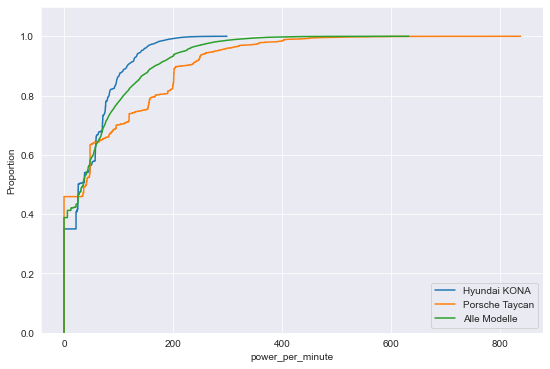

In [7]:
plt.figure(figsize=(9, 6))

sns.ecdfplot(data=df_results_single_row_KONA, x="power_per_minute", label="Hyundai KONA")
sns.ecdfplot(data=df_results_single_row_taycan, x="power_per_minute", label = "Porsche Taycan")
sns.ecdfplot(data=df_results_single_row_allModels, x="power_per_minute", label="Alle Modelle")

plt.ylim(0, 1.1)
plt.legend()
plt.show()